# Questions to Answer
1. Are Linear Representations better than Probability estimates, principle components, and random projections at distinguishing between modal features?
    - Is this true averaged across datasets?
        - Yes, but different trends for Shades and Generalization Datasets
    - Is this true for each dataset individually?
2. How do these vectors arise over the course of layers? Answer with Shades data.
    - Expected
3. How do these vectors arise over the course of training? Answer with OLMO with shades data
    - Expected
4. How do these vectors change with scale?
    - Bigger models are emphatically better

In [1]:
import numpy as np
import pandas as pd
import os
import copy

In [22]:
ALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "meta-llama/Llama-3.2-3B", "allenai/OLMo-2-0425-1B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b"]

SMALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B",]

BIG_MODELS = ["meta-llama/Llama-3.2-3B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b"]

PARAM2MODEL = {
    "<1B": ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"],
    "1B-2B": ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B"],
    "2B-5B": ["google/gemma-2-2b", "meta-llama/Llama-3.2-3B"],
    "5B-10B": ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b"],
}

STEP = [150, 1000, 5000, 10000, 25000, 50000, 99000, 250000, 500000, 928000]

CONDITIONS = ["Linear_Representation", "PC", "Probability", "Random"]

In [3]:
def process_shades_results(data, condition):

    if condition != "Probability":
        best_acc = -np.inf
        grp_data = data.groupby("layer")
        for _, grp in grp_data:
            mean_acc = np.mean(grp["accuracy"])
            if mean_acc > best_acc:
                best_acc = mean_acc
        return mean_acc
    else:
        return np.mean(data["accuracy"])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# DF to hold all of the classification results

df = {
    "Dataset": [],
    "Comparison": [],
    "Accuracy": [],
    "Model": [],
    "Condition": [],
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for model in ALL_MODELS:
    for condition in CONDITIONS:
        for comparison in comparisons:
            path = os.path.join("../results", model, "Linear_Representation", condition, comparison + ".csv")
            mean_acc = process_shades_results(pd.read_csv(path), condition)
            df["Dataset"].append("Shades")
            df["Comparison"].append(comparison)
            df["Accuracy"].append(mean_acc)
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add goulding dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "goulding", "data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Goulding")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add DTFIT dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "DTFit_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-2")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add EventsAdapt dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "EventsAdapt_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-1")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add EventsRev dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "EventsRev_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-3")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

df["Full Comparison"] = copy.deepcopy(df["Comparison"])
# Add Vega-Mendoza dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "vega_mendoza", "data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Vega-Mendoza")
            if row["comparison"] in ["probable_improbable_unrelated", "probable_improbable_related"]:
                comparison = "probable_improbable"
            elif row["comparison"] in ["probable_inconceivable_unrelated", "probable_inconceivable_related"]:
                comparison = "probable_inconceivable"
            elif row["comparison"] in ["improbable_unrelated_inconceivable_unrelated", "improbable_unrelated_inconceivable_related",
                                    "improbable_related_inconceivable_unrelated", "improbable_related_inconceivable_related"
                                    ]:
                comparison = "improbable_inconceivable"
            else:
                print(row["comparison"])

            df["Comparison"].append(comparison)
            df["Full Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Turn it into a dataframe
df = pd.DataFrame.from_dict(df)

In [6]:
# Inspect
df[df["Condition"] == "Probability"].head()

,Dataset,Comparison,Accuracy,Model,Condition,Full Comparison
12,Shades,probable_improbable,0.800000,openai-community/gpt2,Probability,probable_improbable
13,Shades,probable_impossible,0.871429,openai-community/gpt2,Probability,probable_impossible
14,Shades,probable_inconceivable,0.942857,openai-community/gpt2,Probability,probable_inconceivable
15,Shades,improbable_impossible,0.771429,openai-community/gpt2,Probability,improbable_impossible
16,Shades,improbable_inconceivable,0.957143,openai-community/gpt2,Probability,improbable_inconceivable


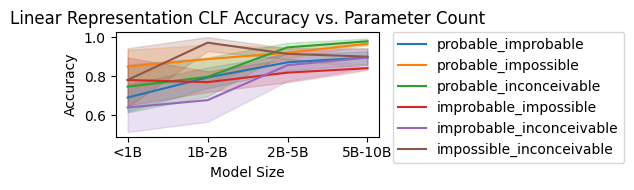

In [9]:
# Plot Size to Performance Comparison
models = df["Model"]
size = []
for model in models:
    for bucket, model_list in PARAM2MODEL.items():
        if model in model_list:
            size.append(bucket)
df["Model Size"] = size

plt.figure(figsize=(6, 2))
linear_representations = df[df["Condition"] == "Linear_Representation"]
sns.lineplot(data=linear_representations, x="Model Size", y="Accuracy", hue="Comparison", errorbar="ci", err_style="band")
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Linear Representation CLF Accuracy vs. Parameter Count")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

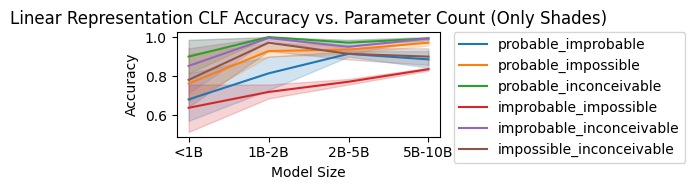

In [184]:
# Plot Size to Performance Comparison
models = df["Model"]
size = []
for model in models:
    for bucket, model_list in PARAM2MODEL.items():
        if model in model_list:
            size.append(bucket)
df["Model Size"] = size

plt.figure(figsize=(6, 2))
linear_representations = df[df["Condition"] == "Linear_Representation"]
sns.lineplot(data=linear_representations[linear_representations["Dataset"] == "Shades"], x="Model Size", y="Accuracy", hue="Comparison", errorbar="ci", err_style="band")
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Linear Representation CLF Accuracy vs. Parameter Count (Only Shades)")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

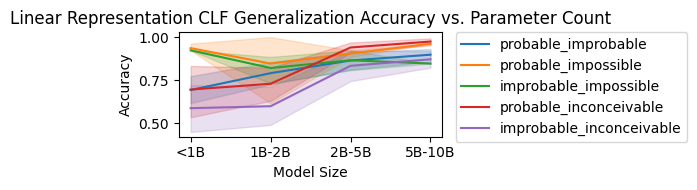

In [35]:
# Plot Size to Performance Comparison
models = df["Model"]
size = []
for model in models:
    for bucket, model_list in PARAM2MODEL.items():
        if model in model_list:
            size.append(bucket)
df["Model Size"] = size

plt.figure(figsize=(6, 2))
linear_representations = df[df["Condition"] == "Linear_Representation"]
sns.lineplot(data=linear_representations[linear_representations["Dataset"] != "Shades"], x="Model Size", y="Accuracy", hue="Comparison", errorbar="ci", err_style="band")
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Linear Representation CLF Generalization Accuracy vs. Parameter Count")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [185]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

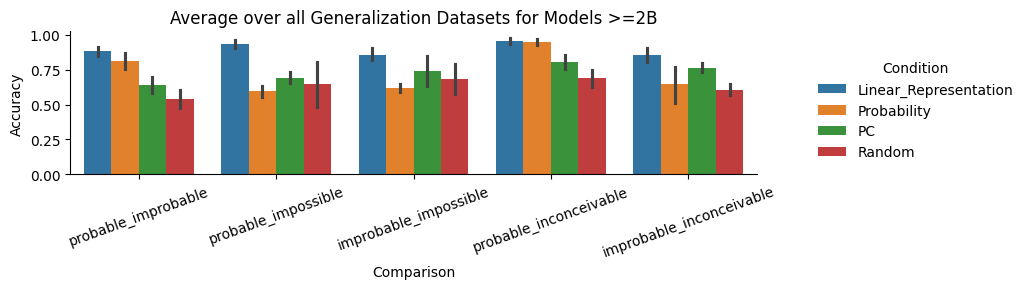

In [28]:
### Plot average over all dataset for each comparison
plt.figure(figsize=(8, 8))
big_df = df[df["Model"].isin(BIG_MODELS)]
hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=big_df[big_df["Dataset"] != "Shades"], x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((1, .8))
g._legend.set_loc('upper left') 
plt.xticks(rotation=20)
plt.title("Average over all Generalization Datasets for Models >=2B")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

<Figure size 800x800 with 0 Axes>

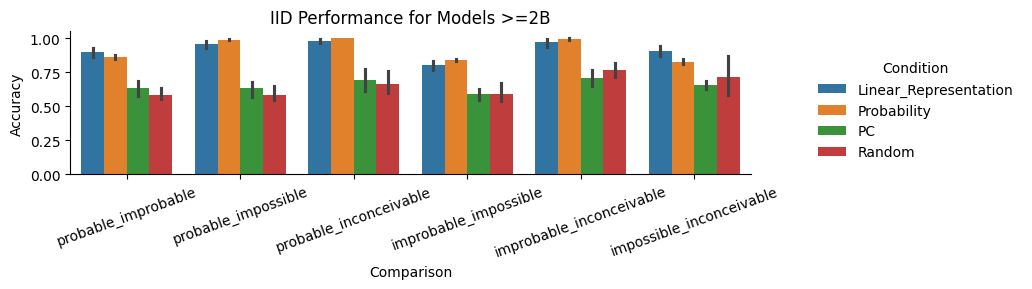

In [29]:
### Plot average over all dataset for each comparison
plt.figure(figsize=(8, 8))
big_df = df[df["Model"].isin(BIG_MODELS)]
hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=big_df[big_df["Dataset"] == "Shades"], x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((1, .8))
g._legend.set_loc('upper left') 
plt.xticks(rotation=20)
plt.title("IID Performance for Models >=2B")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

<Figure size 800x800 with 0 Axes>

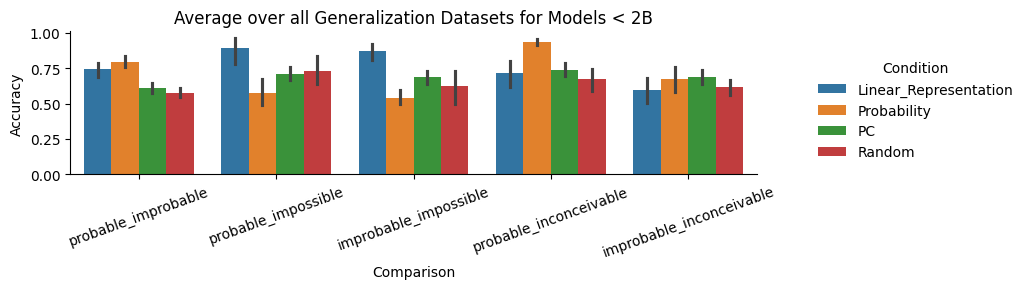

In [30]:
### Plot average over all dataset for each comparison
plt.figure(figsize=(8, 8))
small_df = df[df["Model"].isin(SMALL_MODELS)]
hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=small_df[small_df["Dataset"] != "Shades"], x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((1, .8))
g._legend.set_loc('upper left') 
plt.xticks(rotation=20)
plt.title("Average over all Generalization Datasets for Models < 2B")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

<Figure size 800x800 with 0 Axes>

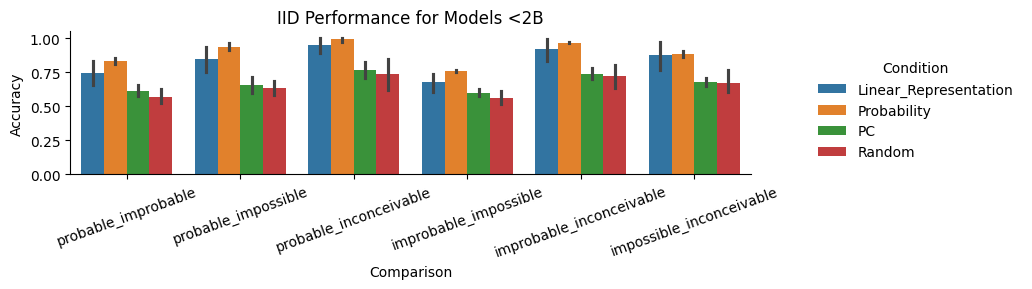

In [31]:
### Plot average over all dataset for each comparison
plt.figure(figsize=(8, 8))
small_df = df[df["Model"].isin(SMALL_MODELS)]
hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=small_df[small_df["Dataset"] == "Shades"], x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((1, .8))
g._legend.set_loc('upper left') 
plt.xticks(rotation=20)
plt.title("IID Performance for Models <2B")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

<Figure size 640x480 with 0 Axes>

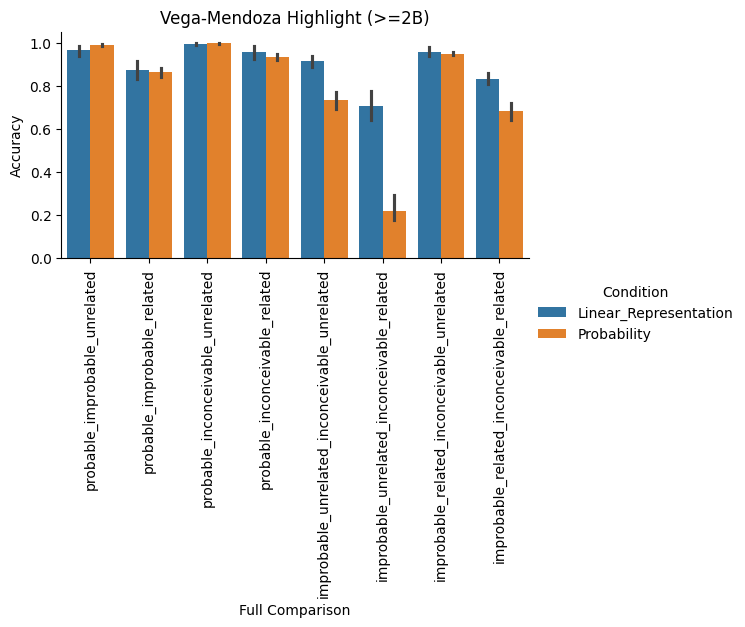

In [34]:
### Highlight Vega-Mendoza
plt.figure()
big_df = df[df["Model"].isin(BIG_MODELS)]
mendoza = big_df[big_df["Dataset"] == "Vega-Mendoza"]
mendoza = mendoza[mendoza["Condition"].isin(["Linear_Representation", "Probability"])]
sns.catplot(data=mendoza, x="Full Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2,)
plt.xticks(rotation=90)
plt.title("Vega-Mendoza Highlight (>=2B)")
plt.show()

In [190]:
## Development of concept vectors through training
# DF to hold all of the classification results

training_df = {
    "Comparison": [],
    "Accuracy": [],
    "Step": [],
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for model in ALL_MODELS:
    for step in STEP:
        for comparison in comparisons:
            path = os.path.join("../results", "allenai/OLMo-2-1124-7B", "Training_Analysis", str(step), "Linear_Representation", comparison + ".csv")
            mean_acc = process_shades_results(pd.read_csv(path), condition)
            training_df["Step"].append(step)
            training_df["Comparison"].append(comparison)
            training_df["Accuracy"].append(mean_acc)



# Turn it into a dataframe
training_df = pd.DataFrame.from_dict(training_df)
training_df["Log(Step)"] = np.log(training_df["Step"])

/tmp/ipykernel_3568944/2160615757.py:3: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=training_df, x="Step", y="Accuracy", hue="Comparison", style="Comparison", errorbar="ci", err_style="band", markers="o", dashes=False)


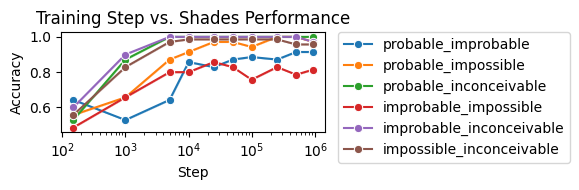

In [191]:
# Plot Train Step to Performance Comparison
plt.figure(figsize=(6, 2))
sns.lineplot(data=training_df, x="Step", y="Accuracy", hue="Comparison", style="Comparison", errorbar="ci", err_style="band", markers="o", dashes=False)
plt.xscale('log')
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Training Step vs. Shades Performance")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [192]:
# DF to hold all of the classification results

layer_df = {
    "Comparison": [],
    "Accuracy": [],
    "Model": [],
    "Layer": []
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for model in BIG_MODELS:
    for comparison in comparisons:
        path = os.path.join("../results", model, "Linear_Representation", "Linear_Representation", comparison + ".csv")
        data = pd.read_csv(path)
        max_layer = data["layer"].max()
        for _, row in data.iterrows():
            if row["layer"] == 0:
                continue
            layer_df["Comparison"].append(comparison)
            layer_df["Accuracy"].append(row["accuracy"])
            layer_df["Layer"].append(row["layer"]/max_layer)
            layer_df["Model"].append(model)

# Turn it into a dataframe
layer_df = pd.DataFrame.from_dict(layer_df)

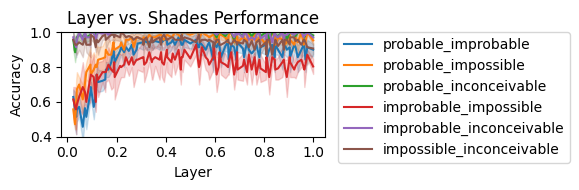

In [193]:
# Plot Train Step to Performance Comparison
plt.figure(figsize=(6, 2))
sns.lineplot(data=layer_df, x="Layer", y="Accuracy", hue="Comparison", errorbar="ci", err_style="band")
# Move legend outside the plot
#plt.xscale("log")
plt.ylim(0.4, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Layer vs. Shades Performance")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()